In [7]:
# #!/usr/bin/env python3

import matplotlib.pyplot as plt
import pandas as pd 
import re
import warnings
warnings.filterwarnings("ignore")

In [8]:
## ~~ READING DATA ~~ ##
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [9]:
## ~~ USEFUL VALUES FOR LATER ~~ ##
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

In [10]:
def get_case_info(country_name):
    country_cases = []

    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())

    return country_cases

In [11]:
## ~~CUMULATIVE CASES OVER TIME~~ ##

def cumulative_plot(x, y, country):
    # window is set as 14 in in the beginning of the notebook 

    months = []

    for date in dates:
        month = re.findall(r"([0-9]{1,2}/1/20)", date)
        if month:
            months.append(month[0])
    
    plt.figure(figsize = (15, 8))
    plt.plot(x, y)
    plt.title('{} Confirmed Cases'.format(country), size = 25)
    plt.xlabel('Date', size = 20)
    plt.ylabel('# of Cases', size = 20)
    plt.yticks(size = 10)
    plt.xticks(months, size = 10)

    plt.show()       

In [12]:
def cumulative_visualization(country_name):
    country_cases = get_case_info(country_name)
    
    cumulative_plot(dates, country_cases, country_name)

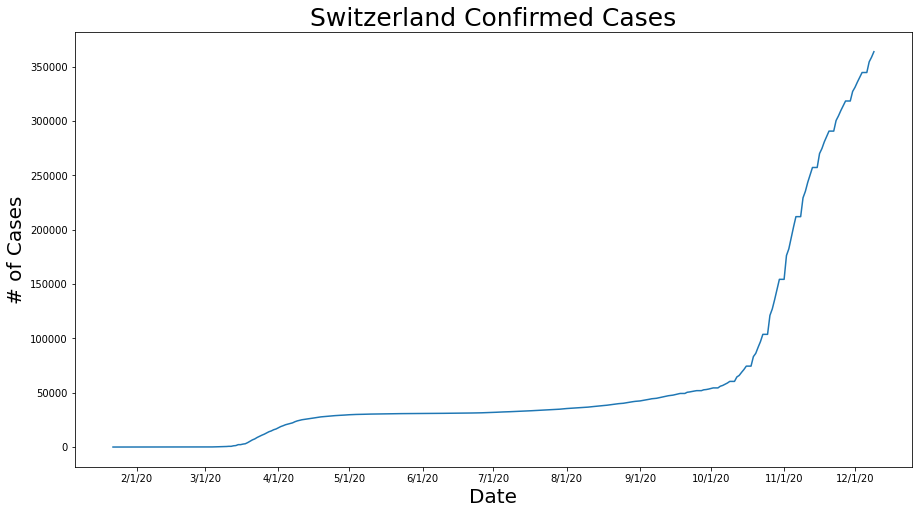

In [13]:
cumulative_visualization("Switzerland")